# **Project Name**  - Uber Supply Demand Gap

# **Project Type** - EDA

# **Contribution** - Individual

# **Project By:** Siddhi Wagh

**Project Summary**

This project focuses on analyzing Uber ride request data to identify and address key operational challenges related to driver availability, trip cancellations, and unfulfilled ride requests. The dataset includes crucial variables such as request timestamps, pickup points (city or airport), driver IDs, trip status, and drop timestamps.
The findings will serve as a foundation for data-driven recommendations to improve service efficiency, balance supply with demand, reduce cancellations, and enhance the overall customer experience. The project ultimately supports Uber’s goal of optimizing its operations through actionable insights derived from its own ride data.

# **Problem Statement**

There is a need to analyze historical ride request data of Uber, including request timestamps, pickup points, driver assignments, and trip statuses etc. to identify patterns in demand, supply shortfalls, and operational bottlenecks. This analysis will help in formulating strategies to improve service reliability, optimize driver deployment, and minimize cancellations and unfulfilled requests.

#### **Define Your Business Objective?**

Business Objective : To analyze Uber ride request data in order to identify patterns in demand, driver availability, and trip outcomes (completed, cancelled, or unfulfilled), with the goal of uncovering operational inefficiencies such as supply-demand gaps, peak hour shortages, and location-based service issues. The insights derived will support data-driven decisions aimed at improving customer experience and optimizing driver allocation.

## ***1. Know Your Data***

In [1]:
# import python libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

## Data Set Loading (import csv file)

In [11]:
df = pd.read_csv('Uber Request Data2.csv', encoding= 'unicode_escape')

## Dataset Rows & Columns count

In [12]:
df.shape

(6745, 6)

## Dataset First View 

In [13]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57,13-07-2016 22:28
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15,14-07-2016 07:13
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11,15-07-2016 06:07
8,6248,City,1.0,Trip Completed,15-07-2016 17:57,15-07-2016 18:50
9,267,City,2.0,Trip Completed,11-07-2016 06:46,11-07-2016 07:25


## Dataset Information

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## Missing Values/Null Values

Here we can see that Driver id and Drop Timestamp has many null values,but we cannot directly delete those rows because there might be no driver available or the ride might be cancelled for that particular request and that data can be useful providing a lot of information for our analysis so we keep those rows.

## ***2. Understanding Your Variables***

# Dataset Describe

In [47]:
df.describe()

,Request id,Driver id,Request timestamp,Drop timestamp,hour,trip_duration
count,6745.000000,4095.000000,6745,2831,6745.000000,2831.000000
mean,3384.644922,149.501343,2016-07-13 13:42:46.514455296,2016-07-13 13:15:16.404097536,12.956709,52.411515
min,1.000000,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,0.000000,21.000000
25%,1691.000000,75.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,7.000000,41.000000
50%,3387.000000,149.000000,2016-07-13 14:23:00,2016-07-13 12:14:00,13.000000,52.000000
75%,5080.000000,224.000000,2016-07-14 19:39:00,2016-07-14 19:13:30,19.000000,64.000000
max,6766.000000,300.000000,2016-07-15 23:59:00,2016-07-16 01:09:00,23.000000,83.000000
std,1955.099667,86.051994,NaN,NaN,6.504052,13.847065


# Dataset Columns

In [49]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'hour', 'day', 'trip_duration'],
      dtype='object')

## 3. ***Data Wrangling***

What all manipulations have you done and insights you found?

In [19]:
# Changing data type of Request timestamp and Drop timestamp columns

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


*We can see that data type of Request timestamp and Drop timestamp columns have been changed to datetime from objects.*

In [21]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,2016-07-15 06:07:00
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,2016-07-15 18:50:00
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [22]:
# Adding few more columns with data from existing columns

df['hour'] = df['Request timestamp'].dt.hour
df['day'] = df['Request timestamp'].dt.day_name()
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60  # in minutes

In [29]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,day,trip_duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,Wednesday,52.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:00,2016-07-13 22:28:00,21,Wednesday,31.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:00,2016-07-14 07:13:00,6,Thursday,58.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:00,2016-07-15 06:07:00,5,Friday,56.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:00,2016-07-15 18:50:00,17,Friday,53.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Monday,39.0


*Columns added are: hour,day and trip_duration*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

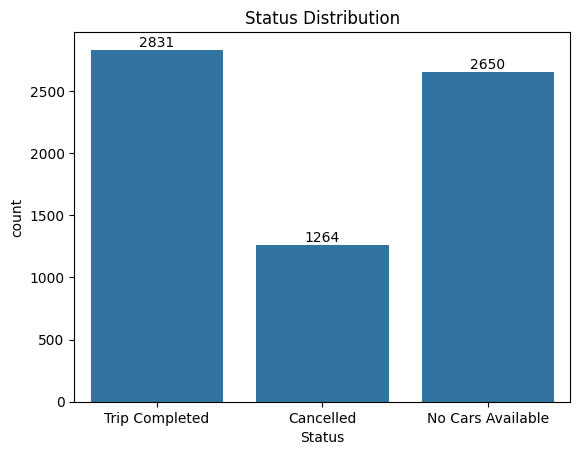

In [23]:
# Chart - 1 visualization code

Graph1 = sns.countplot(data=df, x='Status')
plt.title('Status Distribution')
for bars in Graph1.containers:
    Graph1.bar_label(bars)

##### 1. Why did you pick the specific chart?

It is more convenient to understand the data in bar chart format when there are different categories of data available.

##### 2. What is/are the insight(s) found from the chart?

From the above gragh we can see that while 2831 trips were completed, 1264 trips were cancelleled by drivers and there were no cars available for 2650 requests out of total.

##### 3. Will the gained insights help creating a positive business impact?

Yes.

#### Chart - 2

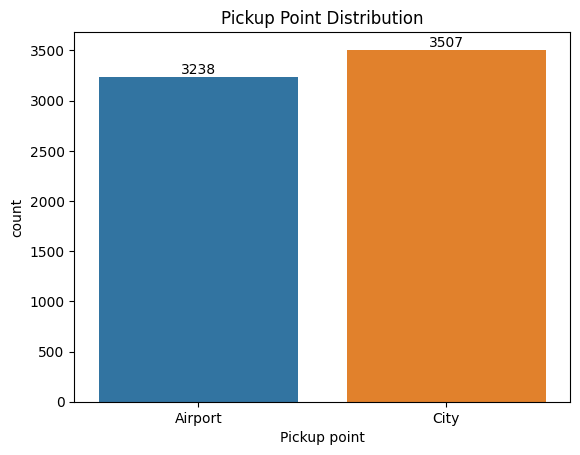

In [24]:
# Chart - 2 visualization code

Graph2 = sns.countplot(data=df, x='Pickup point',hue= 'Pickup point')
plt.title('Pickup Point Distribution')
for bars in Graph2.containers:
    Graph2.bar_label(bars)

##### 1. Why did you pick the specific chart?
   
It is more convenient to understand the data in bar chart format when there are different categories of data available.

##### 2. What is/are the insight(s) found from the chart?

Out of total, there are 3238 requests for airport pickup and 3507 for city, making it more requests for airport rather than city.

##### 3. Will the gained insights help creating a positive business impact?

Yes.

#### Chart - 3

Text(0.5, 1.0, 'Requests by Hour of the Day')

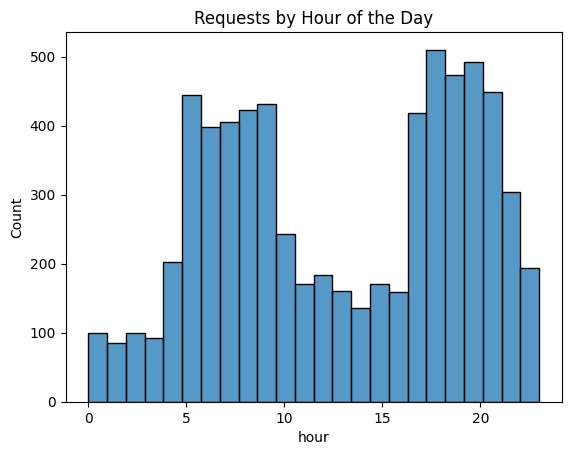

In [25]:
# Chart - 3 visualization code

sns.histplot(df['hour'], bins=24)
plt.title('Requests by Hour of the Day')

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the frequency distribution of requests across different hours of the day, helping to easily identify patterns and peak activity times.

##### 2. What is/are the insight(s) found from the chart?

Most requests occur during 18 hrs to 22 hrs, indicating higher activity around that time of day.

##### 3. Will the gained insights help creating a positive business impact?

Yes, identifying hourly request patterns supports smarter, data-driven decisions

#### Chart - 4

Text(0.5, 1.0, 'Trip Duration Distribution (in minutes)')

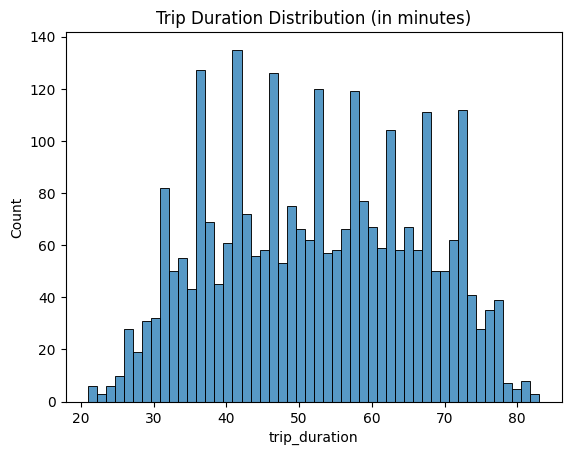

In [26]:
# Chart - 4 visualization code

sns.histplot(df[df['Status']=='Trip Completed']['trip_duration'], bins=50)
plt.title('Trip Duration Distribution (in minutes)')

#### Chart - 5

In [27]:
# Chart - 5 visualization code

completed_trips = df[df['Status'] == 'Trip Completed']

Text(0.5, 1.0, 'Trip Duration Distribution (Completed Trips)')

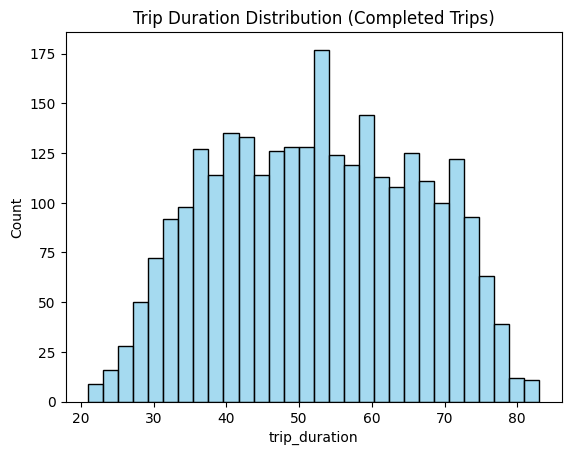

In [28]:
sns.histplot(completed_trips['trip_duration'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Trip Duration Distribution (Completed Trips)')

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the frequency distribution of requests across different hours of the day, helping to easily identify patterns and peak activity times.

##### 2. What is/are the insight(s) found from the chart?

There are very few trips lasting between 10 and 35 minutes. There's a sharp increase in frequency between40 and 60 minutes, indicating that longer trips are relatively rare. This suggests that the service is mostly used for medium-distance travel.


#### Chart - 6

Text(0.5, 1.0, 'Requests by Hour and Status')

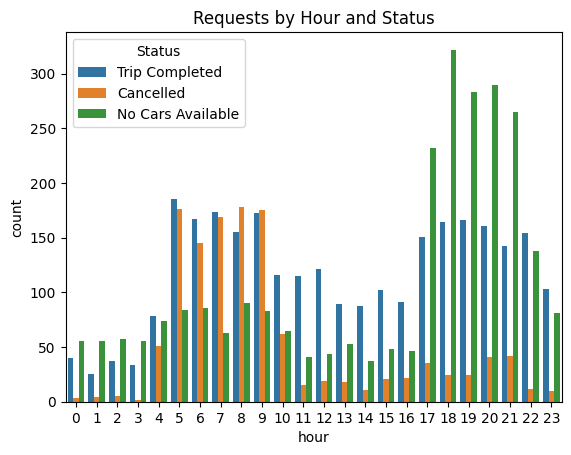

In [31]:
# Chart - 6 visualization code

sns.countplot(x='hour', hue='Status', data=df)
plt.title('Requests by Hour and Status')

##### 1. Why did you pick the specific chart?

This column chart shows which hours see the most cancellations or driver shortages.

##### 2. What is/are the insight(s) found from the chart?

Chart shows that between 5am and 9am most rides were cancelled, whereas between 17hrs and 21hrs there was a shortage of drivers.

#### Chart - 7

Text(0.5, 1.0, 'Status by Pickup Point')

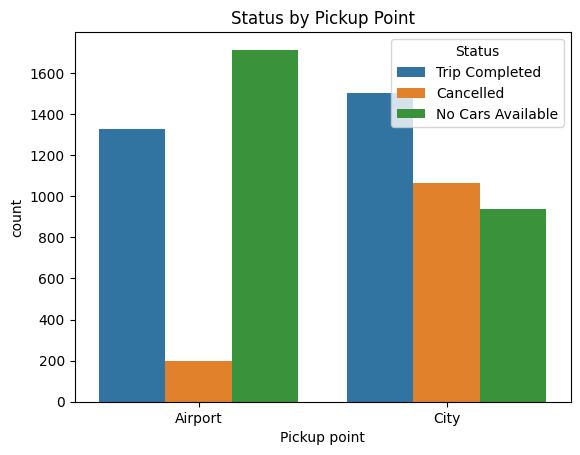

In [32]:
# Chart - 7 visualization code

sns.countplot(x='Pickup point', hue='Status', data=df)
plt.title('Status by Pickup Point')

##### 1. Why did you pick the specific chart?

Column chart helps determine which locations have more unfulfilled or canceled trips.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that Airport has the large number of cars unavailable or drivers shortages whereas for City trips large number of customers have cancelled the ride requests.

#### Chart - 8

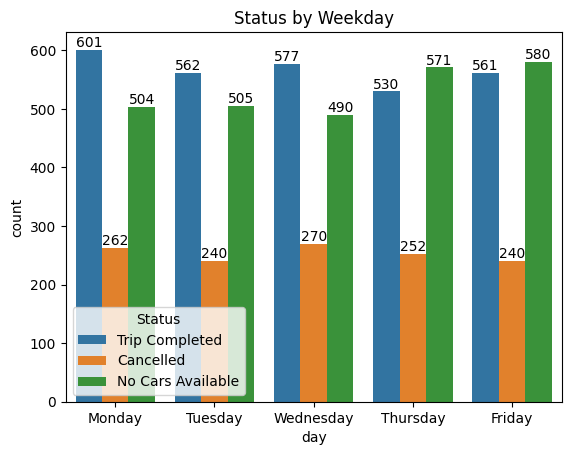

In [43]:
# Chart - 8 visualization code

Graph8= sns.countplot(x='day', hue='Status', data=df)
plt.title('Status by Weekday')
for bars in Graph8.containers:
    Graph8.bar_label(bars)

##### 1. Why did you pick the specific chart?

Column chart will tell if cancellations or unavailability spike on certain days.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the chart that Friday had highest unavailability of cars and lowest cancellations. Most trips were completed on Monday and least on Thursday.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this will help identfying the days needed to improve the rides availability.

#### Chart - 9

Text(0.5, 1.0, 'Request Volume Heatmap: Hour vs Pickup Point')

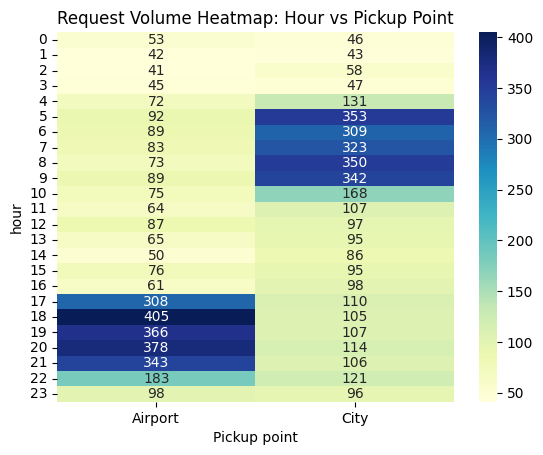

In [44]:
# Chart - 9 visualization code

heatmap_data = df.groupby(['hour', 'Pickup point'])['Request id'].count().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Request Volume Heatmap: Hour vs Pickup Point')

##### 1. Why did you pick the specific chart?
 
Heatpmap will help in identifying high-demand time-location pairs.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that Airport has the highest demand for rides at 6pm with 405 requests whereas most rides for city are at 5 am with 353 requests.

#### Chart - 10

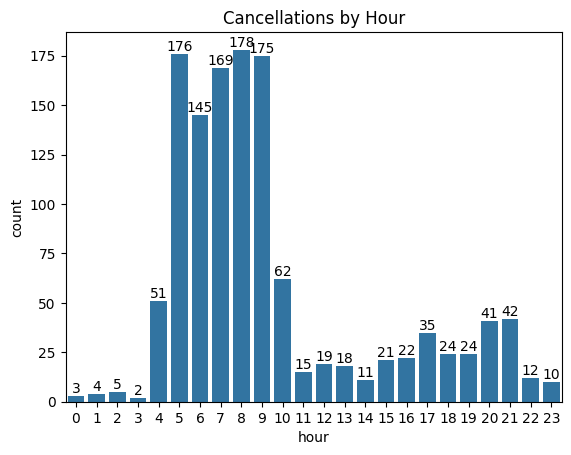

In [45]:
# Chart - 10 visualization code

cancelled = df[df['Status'] == 'Cancelled']
Graph10= sns.countplot(x='hour', data=cancelled)
plt.title('Cancellations by Hour')
for bars in Graph10.containers:
    Graph10.bar_label(bars) 

##### 1. Why did you pick the specific chart?

Used Bar chart to indicate when customers cancel most often.

##### 2. What is/are the insight(s) found from the chart?

Chart shows that most customers have cancelled the rides between 5 am and 9am, possibly due to delays.

#### Chart - 11

Text(0.5, 1.0, 'Driver Availability % by Hour and Pickup Point')

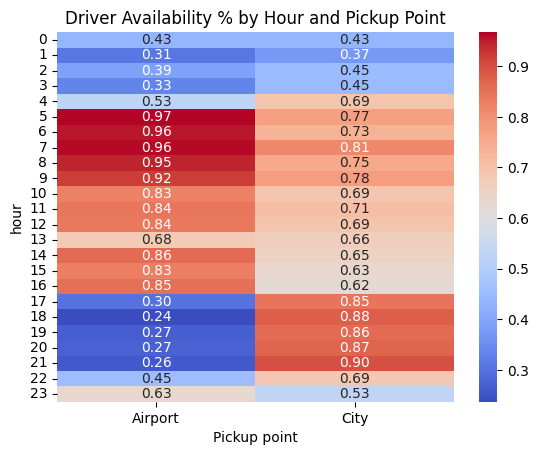

In [46]:
# Chart - 11 visualization code

driver_avail = df.pivot_table(index='hour', columns='Pickup point', values='Driver id', aggfunc=lambda x: x.notna().mean())
sns.heatmap(driver_avail, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Driver Availability % by Hour and Pickup Point')

##### 1. Why did you pick the specific chart?

Heap map chart highlights the areas and times with poor driver availability.

##### 2. What is/are the insight(s) found from the chart?

Heap map chart highlights the areas and times with poor driver availability. Chart shows that Airport had the poorest driver availability at 9 pm whereas highest at 5am. For City ride requests, only 37% driver availability at 1 am and 90% driver availability at 9 pm.

## ***5. Solution to Business Objective***

*What do you suggest the client to achieve Business Objective ? Explain Briefly.*

From the above insights I would suggest:

1. Increase driver availability during peak hours, especially early morning and late evening, with focused deployment at airports.
2. Allocate more drivers to airport locations during high-demand hours, particularly 6 PM and 9 PM, to capitalize on missed revenue.
3. Offer scheduled ride options to build customer confidence.

## ***Conclusion:***


By aligning driver availability with demand patterns, focusing on airport ride optimization, and enhancing customer experience in peak hours, the business can reduce cancellations, increase completed trips, and improve profitability. Leveraging detailed insights from temporal and geographical data will ensure more efficient operations and better customer satisfaction.